# Problem Set 2 - Arctic ice maps

The purpose of this problem set is to become familiar with working with image data, plotting it, and combining it in various ways for analysis.

The data used in this problem set was collected by the AMSR-E instrument [Aqua](http://en.wikipedia.org/wiki/Aqua_%28satellite%29) satellite. The data consists of maps of the concentration of ice in the Arctic collected between 2006 and 2011. I have downloaded and extracted the maps from [here](http://www.iup.uni-bremen.de/seaice/amsr/) and have put them in a format that you can more easily used (if you are interested in using the raw data directly, let me know and I can show you).

The data you should is in the [data/ice_data.tgz](data/ice_data.tgz) file (on Windows you can use the [data/ice_data.zip](data/ice_data.zip) file). This is actually a subset of the data, with only two ice maps every month.

The data is in 'Numpy' format, which means that you can read it as a Numpy array using:

    >>> import numpy as np
    >>> data = np.load('ice_data/20080415.npy')

which will give you a 2-d array. Just for information, this was created with:

    >>> np.save('ice_data/20080415.npy', data)

## Part 1 - examining a single map (6 points)

**Start off by reading in one of the maps as shown above, and plot it with Matplotlib**. Note that to get the correct orientation, you will need to call the ``imshow`` command with the ``origin='lower'`` option, which ensures that the (0,0) pixels is on the bottom left, not the top left. You can try and use different colormaps if you like (set by the ``cmap`` option) - see [here](http://matplotlib.org/examples/color/colormaps_reference.html) for information on the available colormaps. You can specify a colormap to use with e.g. ``cmap=plt.cm.jet`` (i.e. ``cmap=plt.cm.`` followed by the name of the colormap). Note that you can make figures larger by specifying e.g.

    >>> plt.figure(figsize=(8,8))

where the size is given in inches. Try and find a way to plot a colorbar on the side, to show what color corresponds to what value. Remember that you can always look at the examples in the [Matplotlib Gallery](http://matplotlib.org/gallery.html) to find examples. You can also try and remove the tick labels (``100``, ``200``, etc.) since they are not useful - but don't worry if you can't figure out how.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import locale
from datetime import datetime

In [2]:
# Caricamento dati
data_img = str(20200701)

try:
    dati_ghiaccio = np.load('data/ice_data/' + data_img + '.npy')
    print(f"Dati caricati correttamente. Dimensioni punti array: {dati_ghiaccio.shape}")
except FileNotFoundError:
    print("Errore: File non trovato. Verificare il percorso.")

Dati caricati correttamente. Dimensioni punti array: (550, 500)


In [3]:
# Converti i giorni e i mesi in stringhe per il titolo

anno = data_img[:4]
mese_num = int(data_img[4:6])
giorno = data_img[6:]

locale.setlocale(locale.LC_TIME, 'it_IT.UTF-8')  # Imposta la localizzazione in italiano

mese = datetime(1900, mese_num, 1).strftime('%B')

In [4]:
# Configurazione per notebook
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [5]:
# Visualizzazione
plt.figure(figsize=(10, 8))
mappa = plt.imshow(dati_ghiaccio, 
                  origin='lower', 
                  cmap=plt.cm.Blues)

plt.title('Concentrazione di ghiaccio - '+giorno+' '+mese+' '+anno, fontsize=14)
plt.xlabel('Coordinata X')
plt.ylabel('Coordinata Y')

Text(0, 0.5, 'Coordinata Y')

In [6]:
# Barra dei colori
barra_colori = plt.colorbar(mappa, fraction=0.046, pad=0.04)
barra_colori.set_label('Concentrazione (0-100)',
                       rotation=90,
                       labelpad=1) # Imposta la distanza tra la label e la barra

In [7]:
# Nascondi valori sugli assi
plt.xticks([])
plt.yticks([])

([], [])

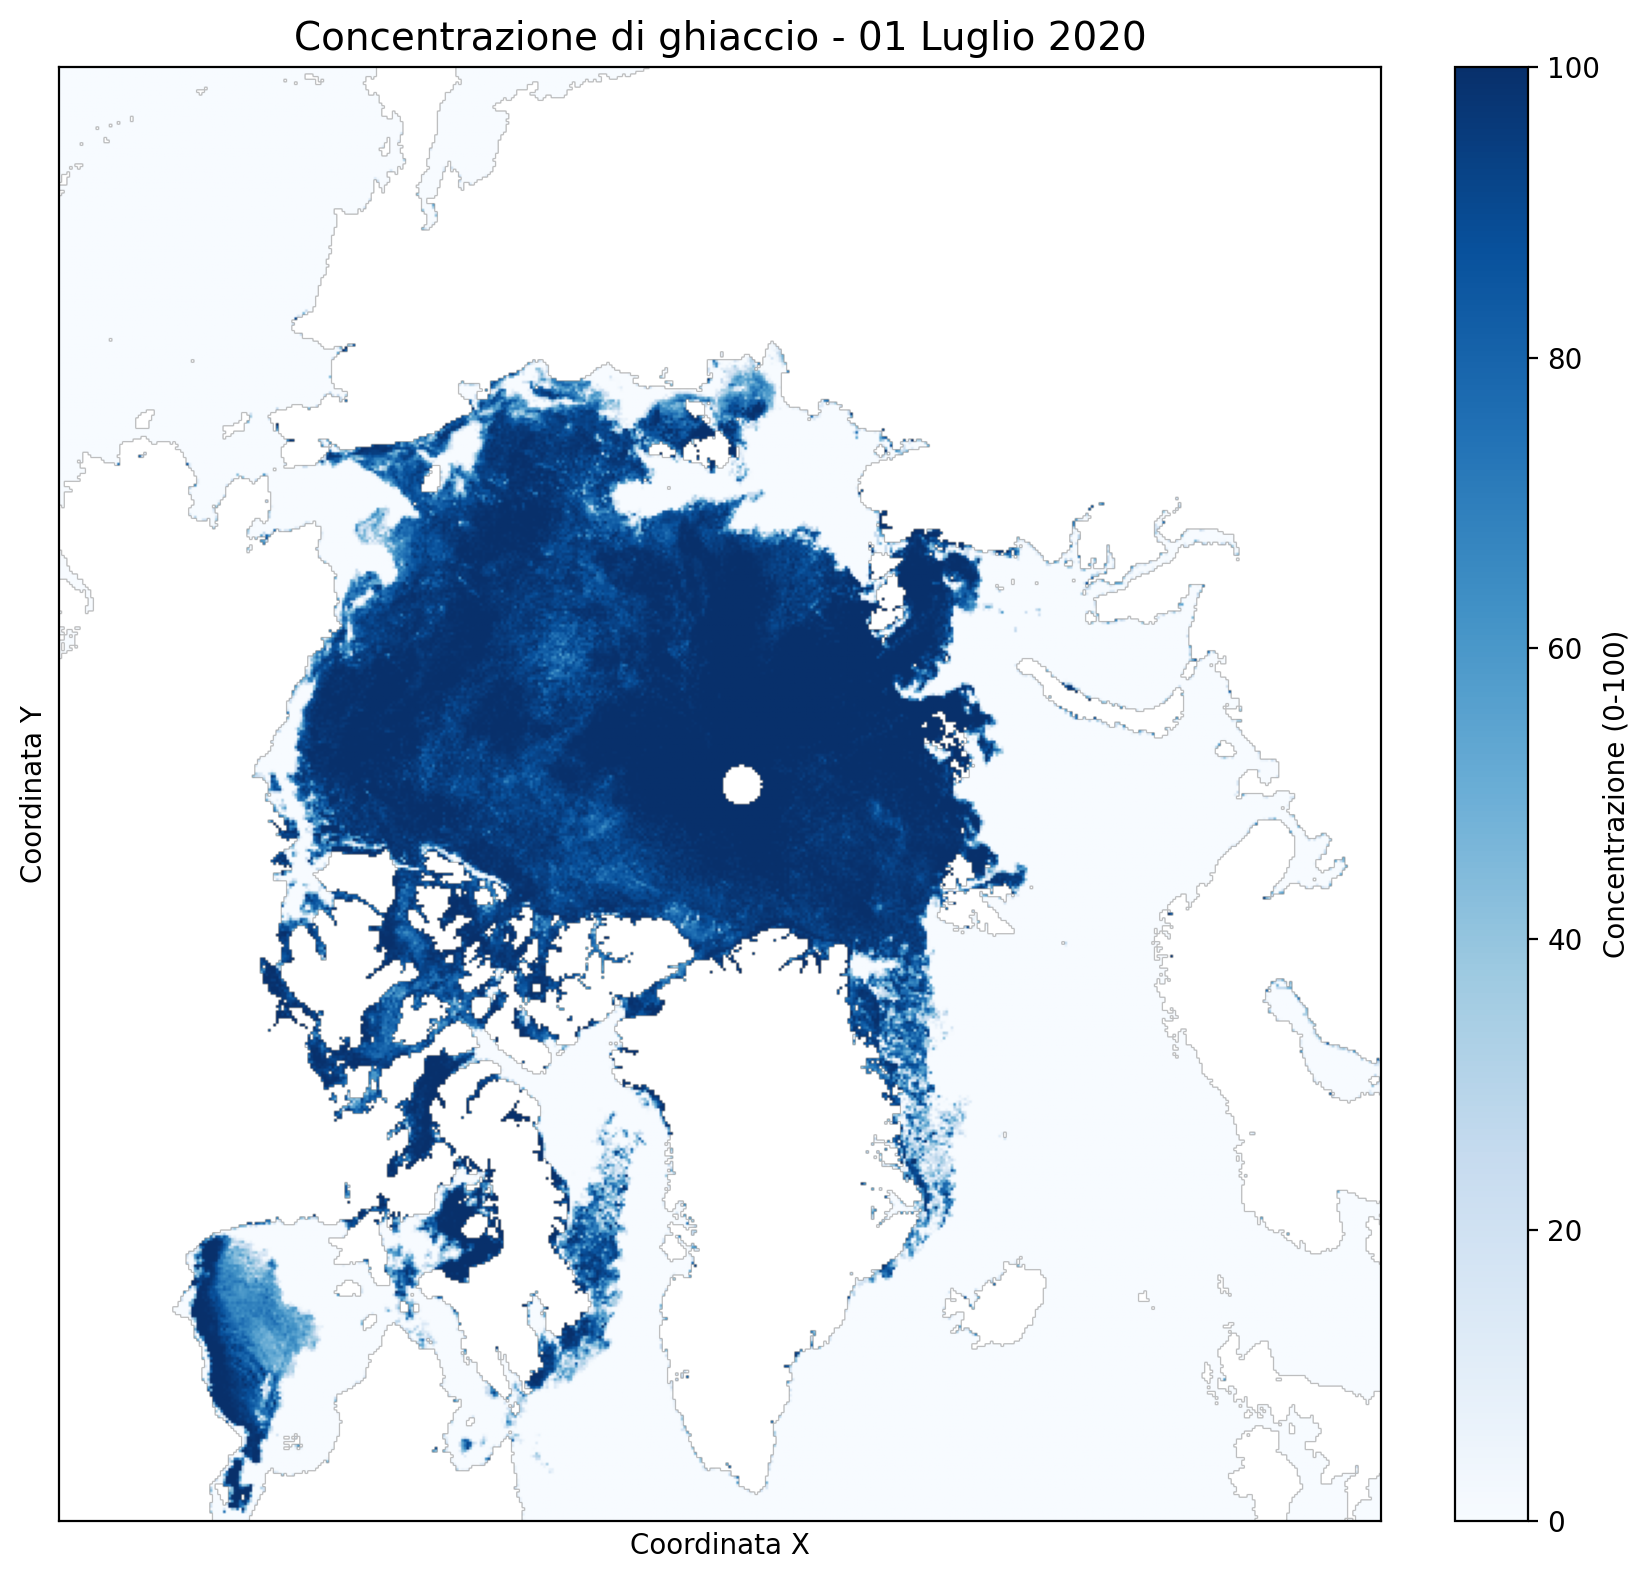

In [8]:
plt.tight_layout() # tight_layout() per un migliore posizionamento degli elementi
plt.show()

## Part 2 - reading in multiple maps (10 points)

**2.1** GOAL-> We now want to make a plot of the ice concentration over time. Reading in a single map is easy, but since we have 455 maps, we do not want to read them all in individually by hand.

A) **Write a loop over all the available files, and inside the loop, read in the data to a variable (e.g. ``data``), and also extract the year, month, and day as integer values (e.g. ``year``, ``month``, and ``day``)**. 

B) Then, also inside the loop, **compute a variable ``time``** which is essentially the fractional time in years (so 1st July 2012 is 2012.5). For simplicity, you can assume that each month has 30 days; this will not affect the results later. 

C) Finally, also **compute for each file the total number of pixels that have a value above 50%**. 

D) After the loop, **make a plot of the number of pixels with a concentration above 50% against time**.

You will likely notice that the ticks are in a strange format, where they are given in years since 2006, but you can change this with the following code:

    >>> from matplotlib.ticker import ScalarFormatter
    >>> plt.gca().xaxis.set_major_formatter(ScalarFormatter(useOffset=False))

In all other cases, you can ignore these lines.   

**2.2**  GOAL -> To deal with a little more than just the number of pixels, so we will compute the area where the ice concentration is above a given threshold. 
However, we first need to know the effective area of the pixels in the image, as each pixel has a different area. The areas (in km^2) are contained inside the file named ``ice_data_2019_area.npy`` (which remains the correct file despite the name). This file was downladed [here](https://seaice.uni-bremen.de/data/grid_coordinates/GridCellArea/) (PolStereo_GridCellArea_n12.5km_Arctic.nc) and then converted.    

**Read in the areas and make a plot (with colorbar) to see how the pixel area is changing over the image.**      


Now, loop over the files again as before, but this time, for each file, **compute the total area where the concentration of ice is 15% or above. Make a new plot showing the area of >15% ice concentration against time.**      

 
**Describe what you see - how does the minimum change over time?** 

In [9]:
# importa moduli
import numpy as np
import matplotlib.pyplot as plt
import glob
from matplotlib.ticker import ScalarFormatter
import os

In [10]:
# Configurazione
%matplotlib inline
plt.style.use('seaborn-v0_8') #è un comando che applica uno stile predefinito di Matplotlib chiamato 'seaborn' a tutti i grafici che verranno creati successivamente nel notebook. Questo stile migliora l'aspetto visivo dei tuoi plot con diverse modifiche automatiche:

### Step 2.1: Conteggio pixel con concentrazione >50%

In [11]:
# Lista dei file (ordine cronologico)
file_list = sorted(glob.glob('data/ice_data/*.npy'))

In [12]:
# Preparazione array per i risultati
times = []
pixel_counts = []

In [13]:
for filename in file_list:
    # Estrai data dal nome file
    date_str = os.path.basename(filename).split('.')[0]
    year = int(date_str[:4])
    month = int(date_str[4:6])
    day = int(date_str[6:8])
    
    # Calcola tempo frazionario (approssimazione: 30 giorni/mese)
    time = year + (month - 1)/12 + (day - 1)/360
    times.append(time)
    
    # Carica dati
    data = np.load(filename)
    
    # Conta pixel >50%
    count = np.sum(data > 0.5)
    pixel_counts.append(count)

In [14]:
# Plot risultati
plt.figure(figsize=(12, 6))
plt.plot(times, pixel_counts, 'o-', markersize=4)
plt.title('Pixel con concentrazione di ghiaccio >50%', fontsize=14)
plt.xlabel('Anno')
plt.ylabel('Numero di pixel')

Text(0, 0.5, 'Numero di pixel')

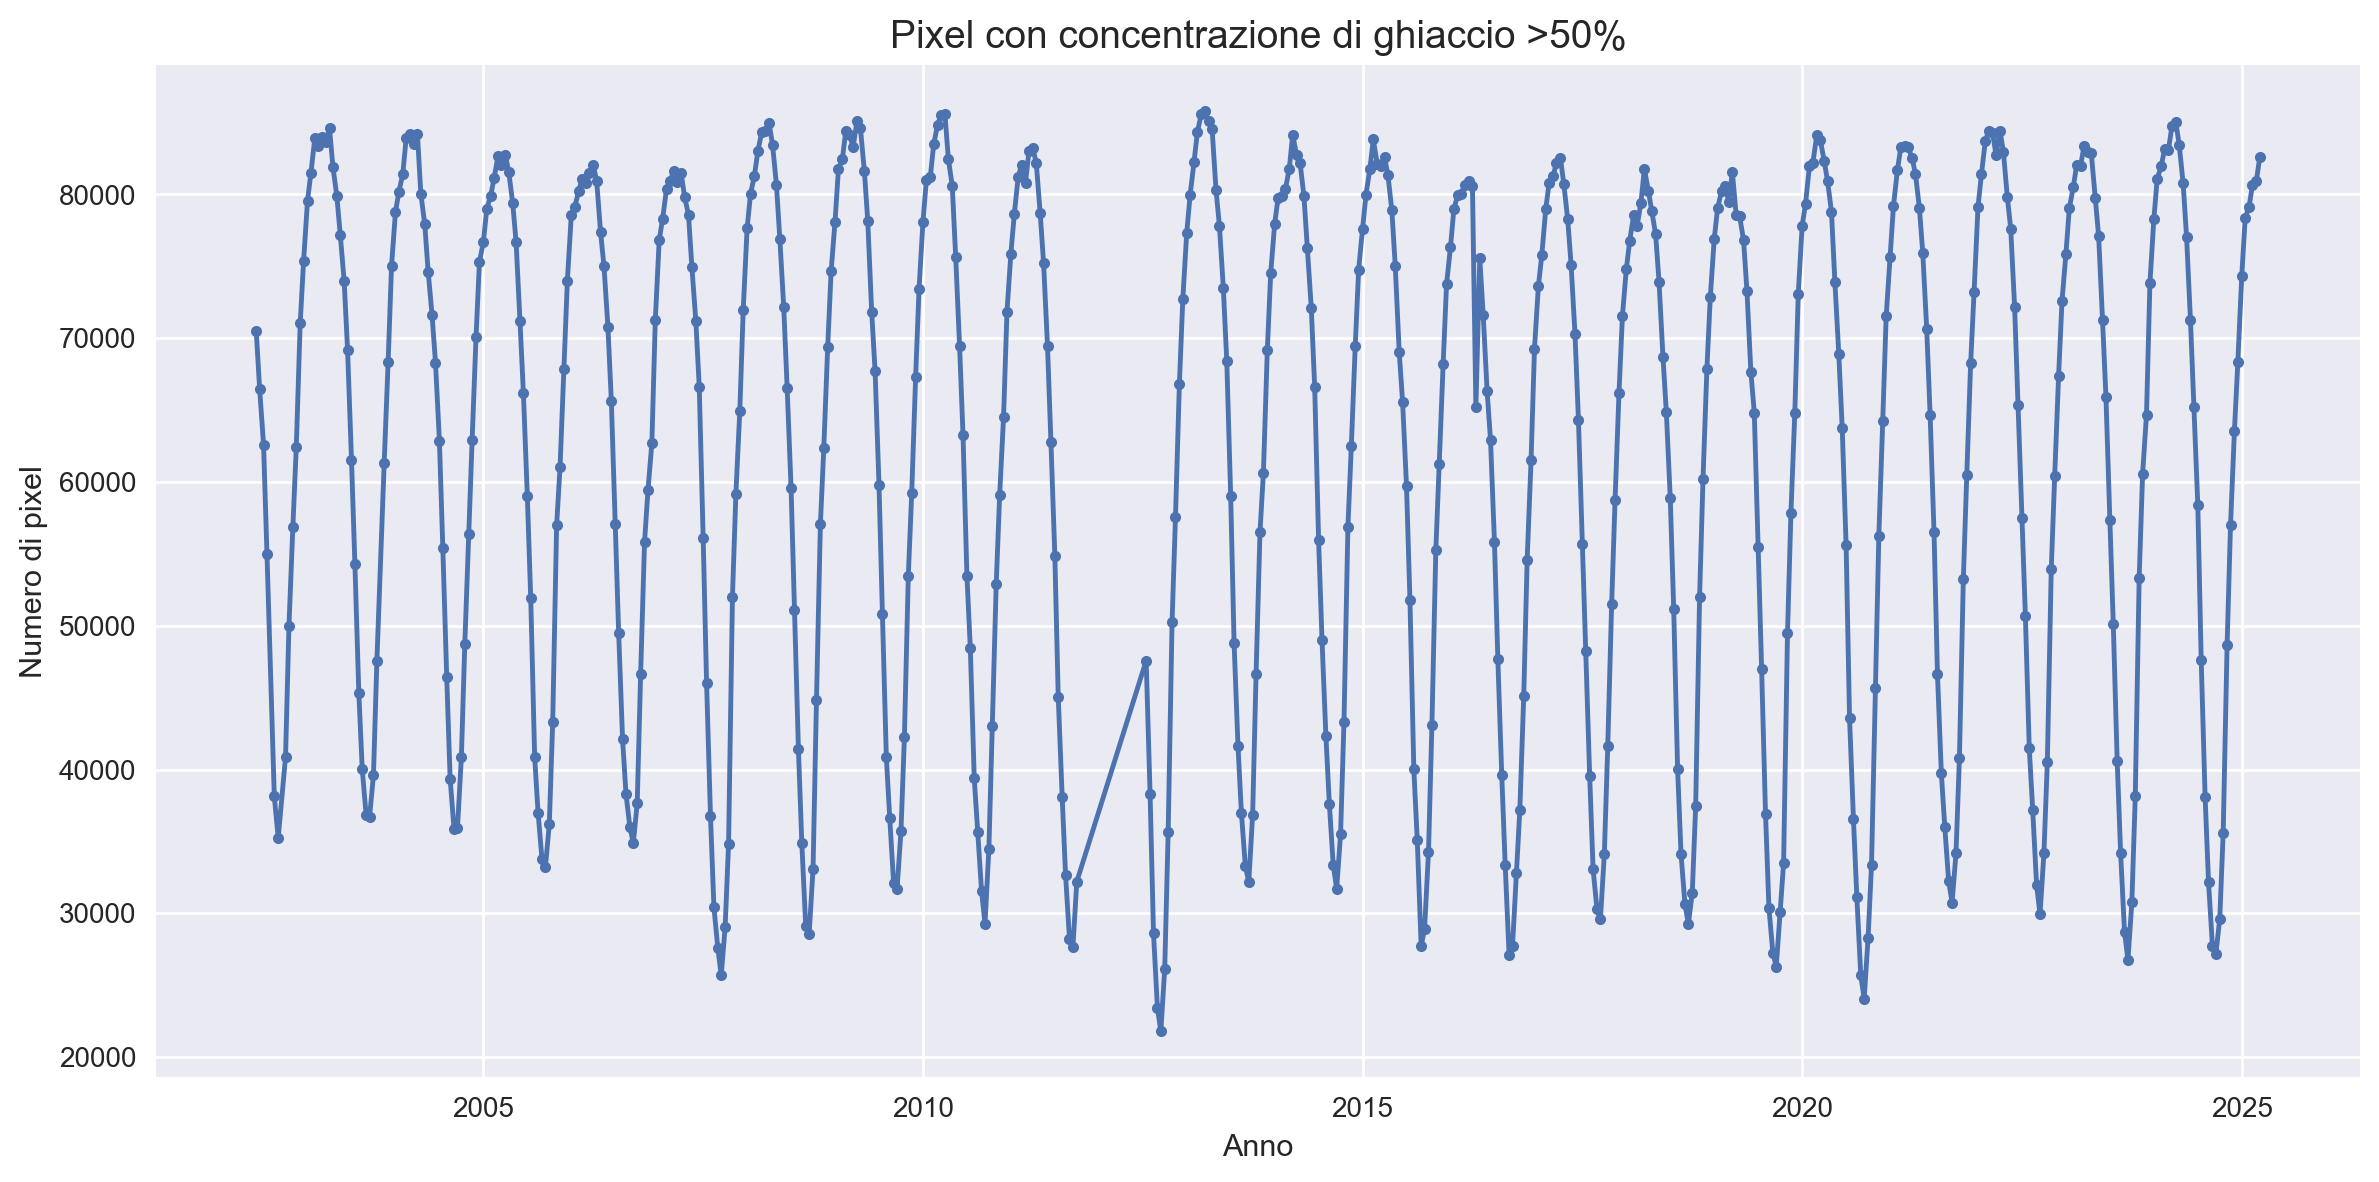

In [15]:
# Formatta asse x
plt.gca().xaxis.set_major_formatter(ScalarFormatter(useOffset=False))
plt.grid(True)
plt.tight_layout()
plt.show()

#### Osservazioni Step 1
 Il grafico mostra una chiara stagionalità con:
 - Massimi invernali (più pixel con ghiaccio)
 - Minimi estivi (meno pixel con ghiaccio)

Si nota anche una possibile tendenza al ribasso nel tempo !


### Step 2.2: Analisi delle aree dei pixel

In [20]:
import xarray as xr
import numpy as np

# Apri il file NetCDF
ds = xr.open_dataset('data/PolStereo_GridCellArea_n12.5km_Arctic.nc')

# Esplora le variabili
print(ds)

<xarray.Dataset> Size: 4MB
Dimensions:  (y: 896, x: 608)
Dimensions without coordinates: y, x
Data variables:
    data     (y, x) float64 4MB ...


In [25]:
da = ds['y']
print(da)

<xarray.DataArray 'y' (y: 896)> Size: 7kB
array([  0,   1,   2, ..., 893, 894, 895])
Dimensions without coordinates: y


In [26]:
# Carica mappa delle aree
path_area_data = "data/PolStereo_GridCellArea_n12.5km_Arctic.nc"
area_data = np.load(ds)





TypeError: expected str, bytes or os.PathLike object, not Dataset

In [ ]:
# Visualizzazione
plt.figure(figsize=(10, 8))
img = plt.imshow(area_data, origin='lower', cmap='viridis')
cbar = plt.colorbar(img)
cbar.set_label('Area (km²)', rotation=270, labelpad=20)
plt.title('Area dei pixel nella proiezione', fontsize=14)
plt.xticks([])
plt.yticks([])
plt.show()

## Part 3 - visualizing changes over time (10 points)

**Find the date at which the area of the region where the ice concentration is above 99% is the smallest**. What is the value of the minimum area?

Next, **read in the map for this minimum, and the map for the same day and month but from 2006**. **Make a side-by-side plot showing the 2006 and the 2011 data**.

**Compute the difference between the two maps** so that a loss in ice over time will correspond to a negative value, and a gain in ice will correspond to a positive value. **Make a plot** of the difference, and use the ``RdBu`` colormap to highlight the changes (include a colorbar).

## Part 4 - yearly averages (4 points)

**Compute average ice concentration maps for 2006 and 2011, and plot them side by side.**

In [ ]:
# %% [markdown]
# ## Parte 3: Calcolo area con ghiaccio >99%

# %%
# Preparazione array
times = []
ice_areas = []

for filename in file_list:
    # Estrai data
    date_str = os.path.basename(filename).split('.')[0]
    year = int(date_str[:4])
    month = int(date_str[4:6])
    day = int(date_str[6:8])
    time = year + (month - 1)/12 + (day - 1)/360
    times.append(time)
    
    # Carica dati
    data = np.load(filename)
    
    # Calcola area con ghiaccio >99%
    mask = data > 0.99
    area = np.sum(area_data[mask])
    ice_areas.append(area)

# %%
# Plot risultati
plt.figure(figsize=(12, 6))
plt.plot(times, ice_areas, 'o-', markersize=4, color='tab:blue')
plt.title('Area con concentrazione di ghiaccio >99%', fontsize=14)
plt.xlabel('Anno')
plt.ylabel('Area (km²)')

# Formatta asse x
plt.gca().xaxis.set_major_formatter(ScalarFormatter(useOffset=False))
plt.grid(True)
plt.tight_layout()
plt.show()

# %% [markdown]
# ### Osservazioni:
# 1. Il grafico mostra un andamento stagionale simile al precedente
# 2. I valori minimi annuali (estivi) mostrano una chiara tendenza al ribasso
# 3. L'area di ghiaccio "permanente" (>99%) si sta riducendo nel tempo
# 4. La variazione interannuale è particolarmente evidente negli ultimi anni

## Epilogue

The data that we have here only cover five years, so we cannot reliably extract information about long term trends. However, it is worth noting that the minimum ice coverage you found here was a record minimum - never before (in recorded history) had the size of the ice shelf been so small. This is part of a long term trend due to global warming. In 2012, the record was again beaten, and most scientists believe that by ~2050, the Arctic will be completely ice-free for at least part of the summer.